In [15]:
from model_evaluate import evaluate_model

In [16]:
# Step 1: Import libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Step 2: Load the saved training and testing data
train_data = pd.read_csv("train_multi_output.csv")
test_data = pd.read_csv("test_multi_output.csv")

# Step 3: Separate features (X) and target variables (y)
X_train = train_data[['Season', 'Day_of_the_week', 'DHI', 'DNI', 'GHI', 'Wind_speed', 'Humidity', 'Temperature']]
y_train = train_data[['PV_production', 'Wind_production']]

X_test = test_data[['Season', 'Day_of_the_week', 'DHI', 'DNI', 'GHI', 'Wind_speed', 'Humidity', 'Temperature']]
y_test = test_data[['PV_production', 'Wind_production']]

In [17]:
# Step 5: Initialize and train the Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=200,       # number of trees (try 100-500)
    max_depth=None,         # let trees expand fully
    random_state=42,
    n_jobs=-1               # use all CPU cores for faster training
)

rf_model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = rf_model.predict(X_test)

--- Random Forest - PV Production ---
MAE: 0.016
MSE: 0.002
RMSE: 0.039
R²: 0.986
Adjusted R²: 0.986
MAPE: 65.64%
Explained Variance: 0.986
Sample Size: 11664
Visualization Sample: 5,000 points


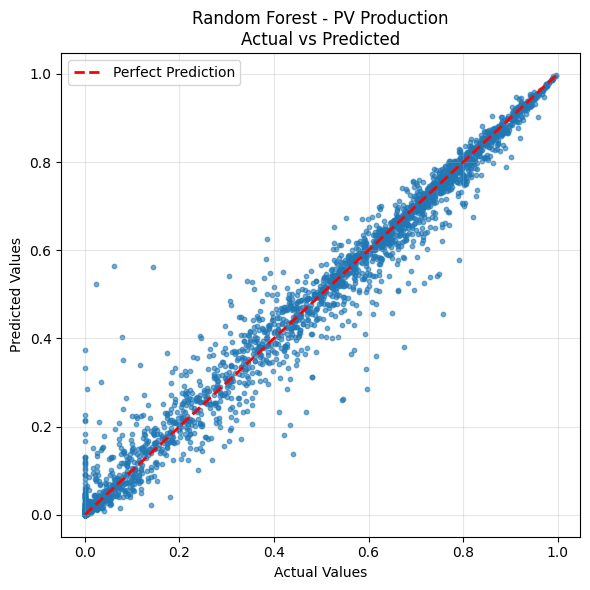

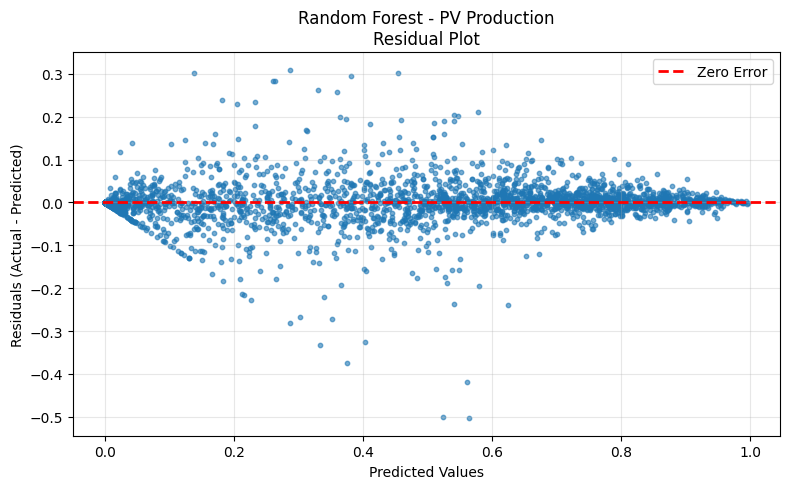

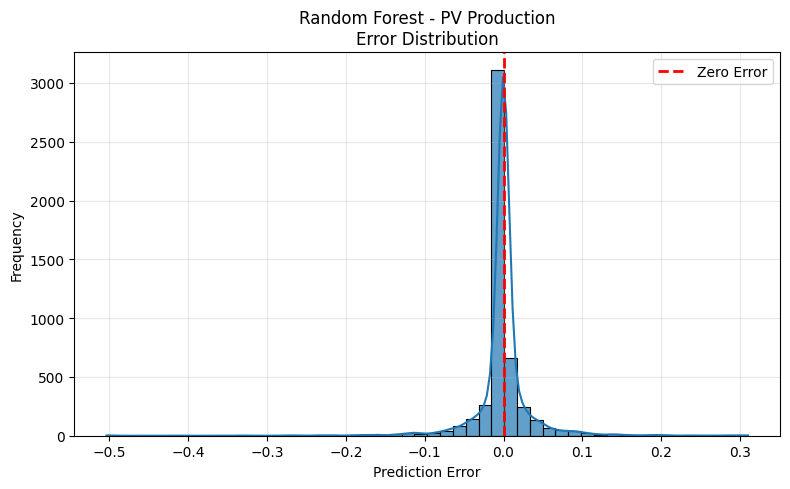

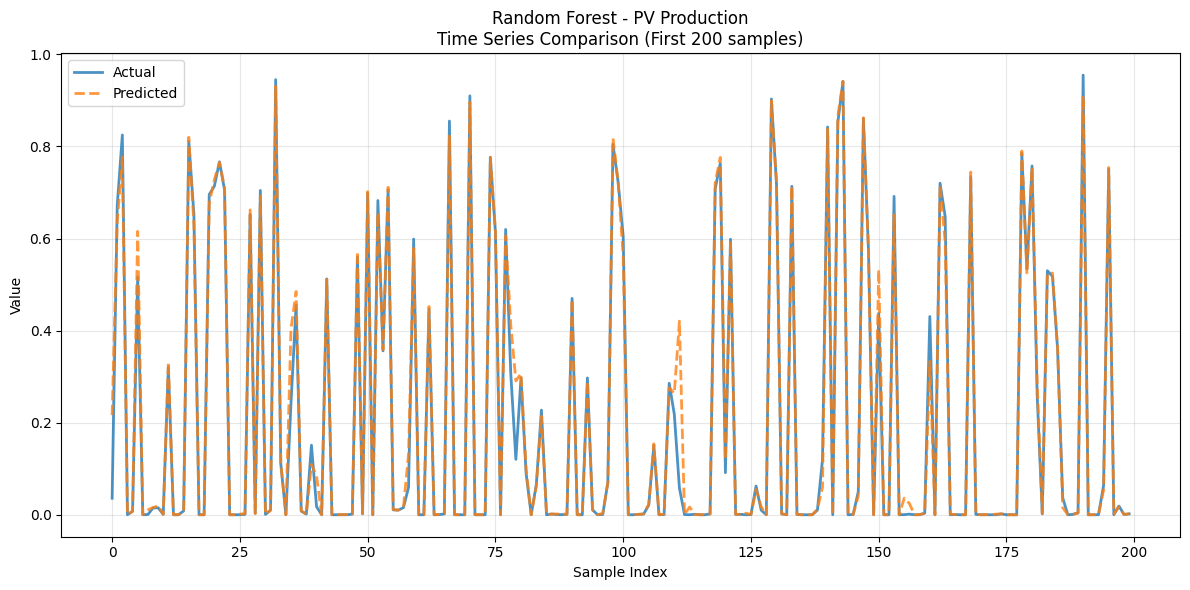

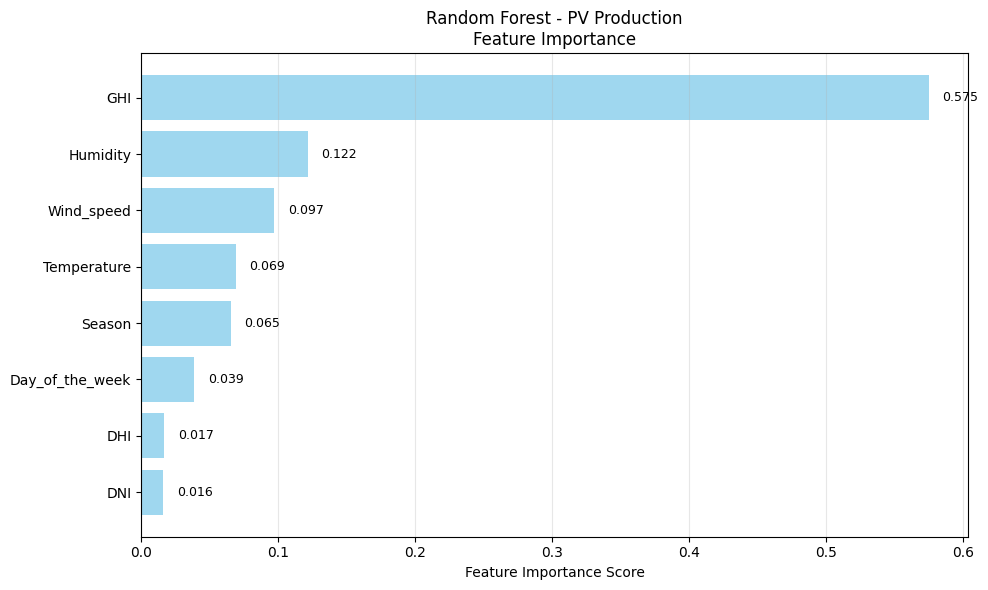


Top Features for PV Production:
           Feature  Importance
4              GHI    0.574990
6         Humidity    0.121640
5       Wind_speed    0.096998
7      Temperature    0.069203
0           Season    0.065439
1  Day_of_the_week    0.038624
2              DHI    0.016892
3              DNI    0.016214
--- Random Forest - Wind Production ---
MAE: 0.024
MSE: 0.002
RMSE: 0.048
R²: 0.956
Adjusted R²: 0.956
MAPE: 16.52%
Explained Variance: 0.956
Sample Size: 11664
Visualization Sample: 5,000 points


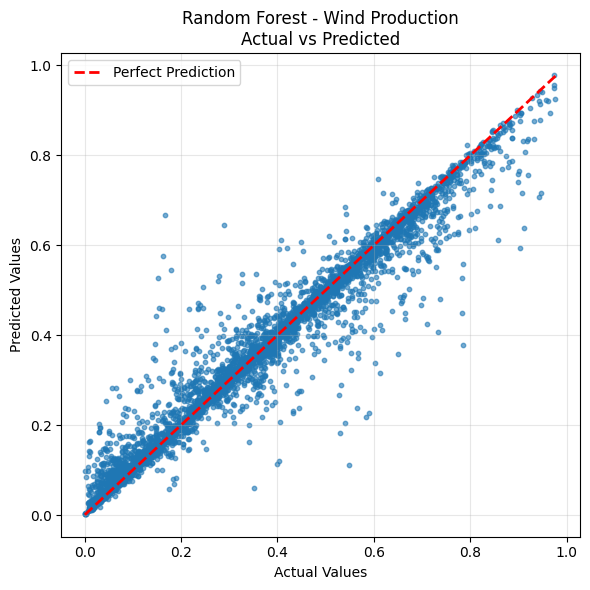

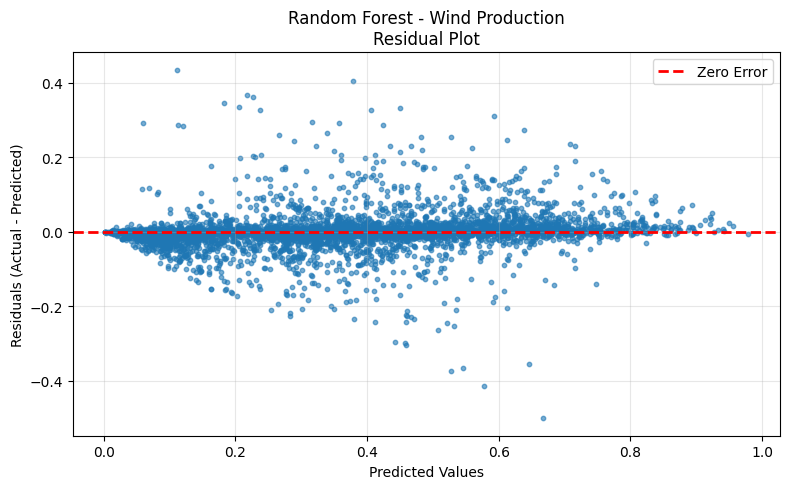

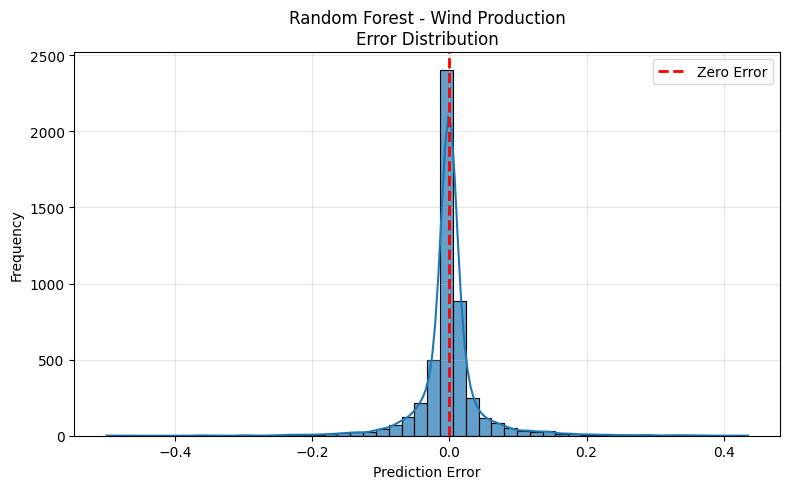

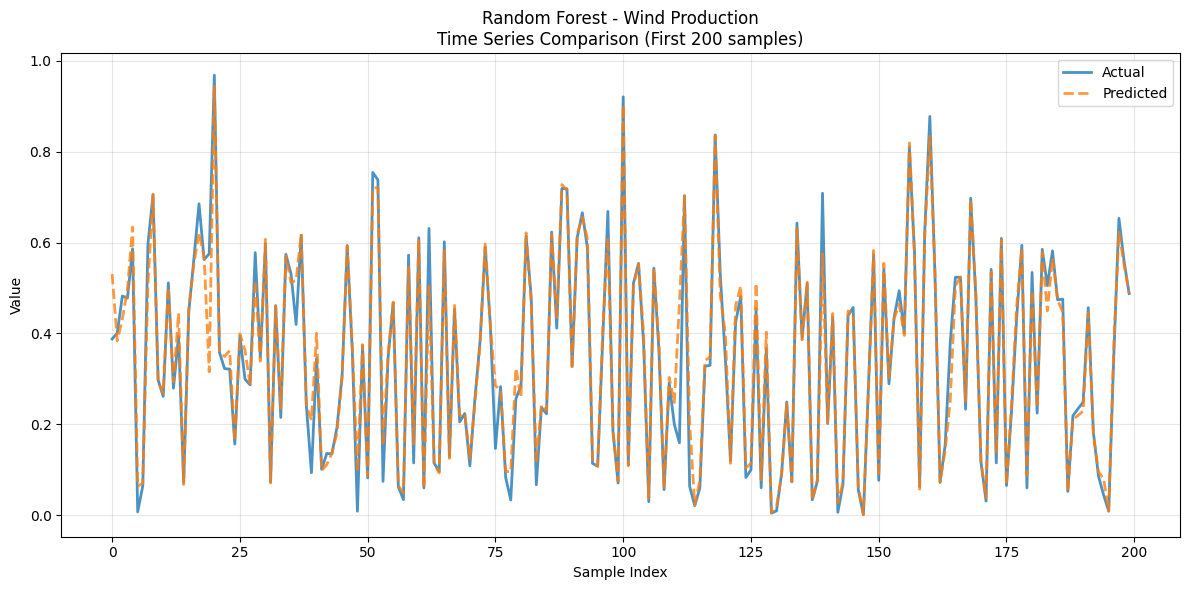

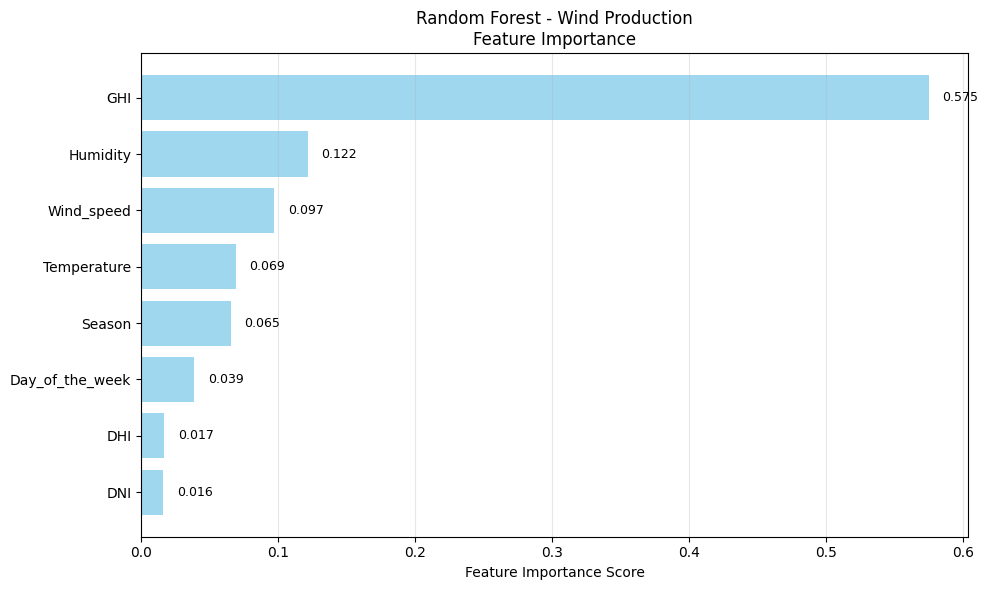


Top Features for Wind Production:
           Feature  Importance
4              GHI    0.574990
6         Humidity    0.121640
5       Wind_speed    0.096998
7      Temperature    0.069203
0           Season    0.065439
1  Day_of_the_week    0.038624
2              DHI    0.016892
3              DNI    0.016214


{'mae': np.float64(0.02444598954335252),
 'mse': np.float64(0.0023249287529877954),
 'rmse': np.float64(0.04821751500220429),
 'r2': 0.9556637292554113,
 'adj_r2': 0.9556332968087398,
 'mape': np.float64(16.52384539772258),
 'explained_variance': 0.955666417095467}

In [18]:
evaluate_model(y_test['PV_production'], rf_model.predict(X_test)[:,0], "Random Forest", "PV Production", X_train.columns, rf_model)
evaluate_model(y_test['Wind_production'], rf_model.predict(X_test)[:,1], "Random Forest", "Wind Production", X_train.columns, rf_model)